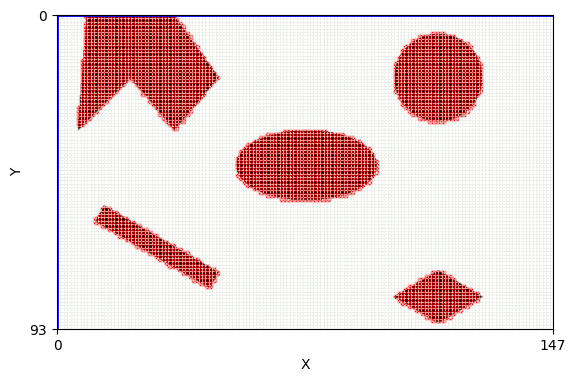

In [2]:
# Import necessary custom-built classes and methods
# from utils.obstacle_space import Map
from obstacle.obstacle_map import Map
from utils.explorer import Explorer
from utils.search import astar_search, path_states, dynamic_weighted_astar_search
import time

initial=(0,0)
goal=(0,142)

map = Map(image_path='./obstacle/o3.png', grid_size=10)
map.draw_coordinate_system()



In [3]:
initial=(0,0)
goal=(140,83)
# Initialize the explorer class
explorer = Explorer(map=map, initial=initial, goal=goal)
# Check validity of start and goal nodes

if map.is_obstacle_in_grid(initial[0], initial[1]):
    print('Start lie in obstacle space!!\nPlease try again')

if map.is_obstacle_in_grid(goal[0], goal[1]):
    print('Goal lie in obstacle space!!\nPlease try again')

Reached: 1778
Elapsed Time: 0.0787348747253418 seconds
path length = 168


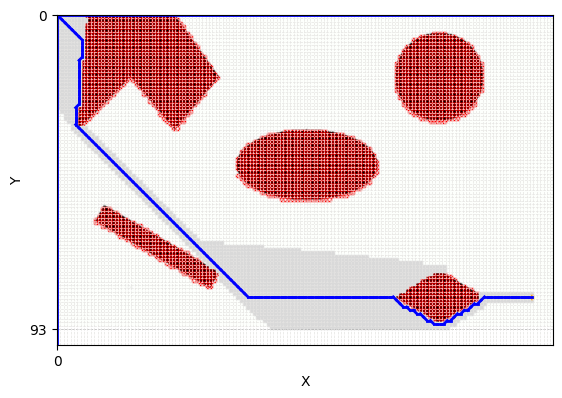

In [4]:
start_time = time.time()
node = astar_search(explorer)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Reached: {len(explorer.reached.keys())}")
print(f"Elapsed Time: {elapsed_time} seconds")

states = path_states(node)
print('path length =', len(states))
explorer.get_reached()
map.draw_path_found(states, initial, goal, explorer.get_reached())

Reached: 583
Elapsed Time: 0.018229961395263672 seconds
path length = 168


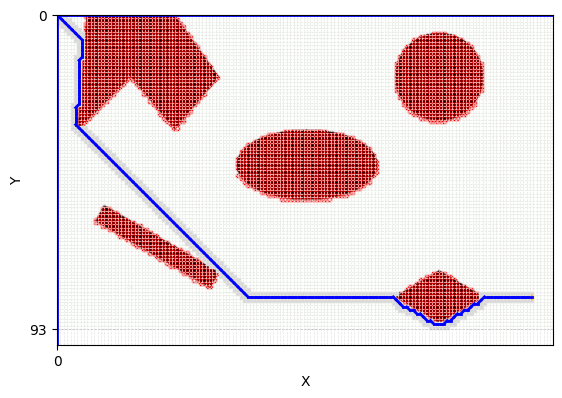

In [6]:
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Reached: {len(explorer.reached.keys())}")
print(f"Elapsed Time: {elapsed_time} seconds")
path = path_states(node)
print('path length =', len(states))
map.draw_path_found(states, initial, goal, explorer.get_reached())

In [ ]:
from path_smooth.path_smooth import simplify_path
simplified_path = simplify_path(path, map)
map.draw_path_found(simplified_path, initial, goal, explorer.get_reached())